In [3]:
import requests

API_KEY = "94b170a79d75de0bfc25c5719fd056b3a51834fe73459c51a26791f1cdc25e13"


model = "meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8"


def ask_together(prompt):
    url = "https://api.together.xyz/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {API_KEY}",
        "Content-Type": "application/json"
    }

    data = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "max_tokens": 512,
        "temperature": 0.7
    }

    response = requests.post(url, headers=headers, json=data)

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error {response.status_code}: {response.text}"

In [6]:
response = ask_together("Hello! Can you summarize a CSV file for me?")
print(response)

To summarize a CSV (Comma Separated Values) file for you, I'll need to know a bit more about what you're looking for. Here are a few questions to get started:

1. **Do you have a specific CSV file in mind?** If so, can you describe it or share its contents (if it's not too large)?
2. **What kind of summary are you looking for?** For example, are you interested in:
   - Basic statistics (e.g., count of rows, mean, median, mode of certain columns)?
   - Data distribution (e.g., histograms, frequency distributions)?
   - Correlation between columns?
   - Identifying missing values or outliers?
   - Something else?

If you can provide the CSV file or a sample of it, and specify what you're trying to understand or achieve, I can offer a more tailored response or guidance on how to analyze it.

### If you can't share the file, here are some general steps you can follow to summarize a CSV:

1. **Open the CSV in a spreadsheet program or a data analysis tool** like Microsoft Excel, Google Sheet

In [8]:
import pandas as pd

data = {
    'Date': ['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
             '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11'],
    'Product': ['Laptop', 'Mouse', 'Desk', 'Chair', 'Monitor',
                'Pen', 'Notebook', 'Tablet', 'Whiteboard', 'Keyboard'],
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture', 'Electronics',
                 'Stationery', 'Stationery', 'Electronics', 'Furniture', 'Electronics'],
    'Quantity': [2, 5, 1, 3, 2, 10, 7, 1, 1, 4],
    'Price': [800, 20, 150, 75, 200, 1.5, 3, 300, 100, 30],
    'Total': [1600, 100, 150, 225, 400, 15, 21, 300, 100, 120],
    'Region': ['North', 'East', 'West', 'South', 'North',
               'East', 'South', 'West', 'East', 'North']
}

df = pd.DataFrame(data)

print(df.head())

         Date  Product     Category  Quantity  Price  Total Region
0  2024-01-02   Laptop  Electronics         2  800.0   1600  North
1  2024-01-03    Mouse  Electronics         5   20.0    100   East
2  2024-01-04     Desk    Furniture         1  150.0    150   West
3  2024-01-05    Chair    Furniture         3   75.0    225  South
4  2024-01-06  Monitor  Electronics         2  200.0    400  North


In [10]:
sample_data = df.head(10).to_csv(index=False)

prompt = f"""You are a data analyst AI. Here is a sample from a dataset:\n{sample_data}\n
Please summarize this data. Describe each column, mention patterns, unusual values, and any insights you can find."""

response = ask_together(prompt)
print(response)

**Dataset Summary**

The provided dataset contains sales data for various products across different regions. The dataset consists of 10 rows and 7 columns.

### Column Descriptions

1. **Date**: The date of the sale in the format `YYYY-MM-DD`. The dates range from `2024-01-02` to `2024-01-11`, indicating a 10-day period.
2. **Product**: The name of the product sold. There are 9 unique products: Laptop, Mouse, Desk, Chair, Monitor, Pen, Notebook, Tablet, Whiteboard, and Keyboard.
3. **Category**: The category to which the product belongs. There are 3 categories: Electronics, Furniture, and Stationery.
4. **Quantity**: The number of units sold. The values range from 1 to 10.
5. **Price**: The price per unit of the product. The values range from $1.5 to $800.
6. **Total**: The total revenue generated from the sale, calculated as `Quantity` × `Price`.
7. **Region**: The region where the sale was made. There are 4 regions: North, East, West, and South.

### Patterns and Insights

* The **El

In [12]:
def ask_question_about_df(question, df):
    
    df_sample = df.head(10).to_csv(index=False)

    prompt = f"""You are a smart data analyst. Here's a sample of a dataset:\n{df_sample}\n
My question is: {question}
Please answer clearly, based on the data."""

    response = ask_together(prompt)
    return response

In [14]:
question = "Which region had the highest total sales?"
response = ask_question_about_df(question, df)
print(response)

## Step 1: Understand the Problem and Data
To determine which region had the highest total sales, we need to analyze the given dataset. The dataset contains information about sales transactions, including the date, product, category, quantity, price, total sales amount, and region.

## Step 2: Identify Relevant Columns
The relevant columns for answering this question are "Region" and "Total". The "Total" column represents the total sales amount for each transaction.

## Step 3: Calculate Total Sales by Region
To find out which region had the highest total sales, we need to sum up the "Total" column for each "Region". This involves grouping the data by "Region" and then calculating the sum of "Total" for each group.

## Step 4: Perform Calculation
Let's calculate the total sales for each region:
- North: 1600 (2024-01-02) + 400 (2024-01-06) + 120 (2024-01-11) = 2120
- East: 100 (2024-01-03) + 15 (2024-01-07) + 100 (2024-01-10) = 215
- West: 150 (2024-01-04) + 300 (2024-01-09) = 450
- So

Matplotlib is building the font cache; this may take a moment.


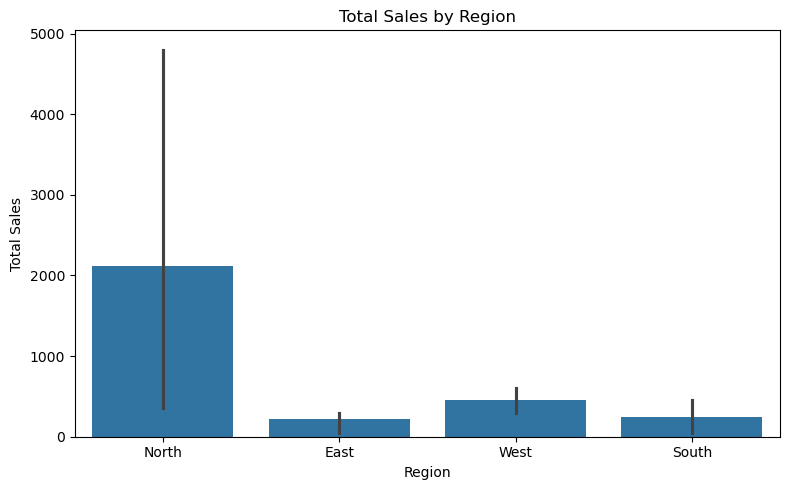

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total', data=df, estimator=sum)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

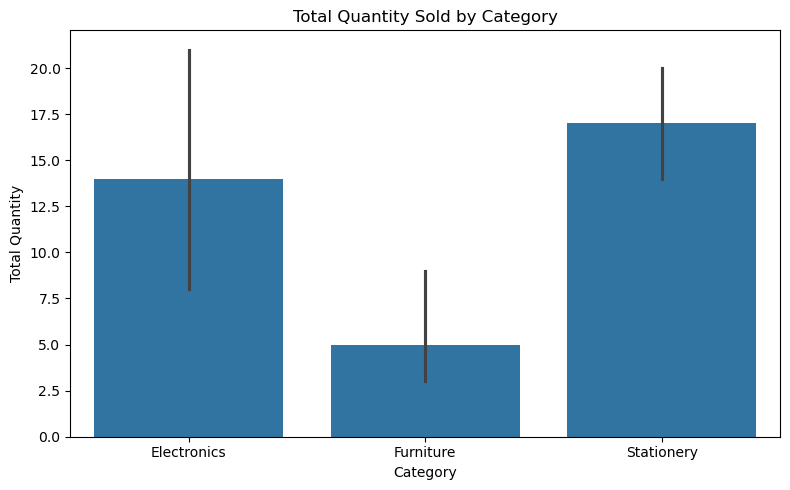

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Quantity', data=df, estimator=sum)
plt.title("Total Quantity Sold by Category")
plt.ylabel("Total Quantity")
plt.xlabel("Category")
plt.tight_layout()
plt.show()